In [1]:
from google.colab import drive
drive.mount('/content/drive')

! echo $PYTHONPATH
%env PYTHONPATH="$/env/python:/content/drive/MyDrive/traj-space/src"
! echo $PYTHONPATH

import sys
sys.path.append('/content/drive/MyDrive/traj-space/src')

Mounted at /content/drive
/env/python
env: PYTHONPATH="$/env/python:/content/drive/MyDrive/traj-space/src"
"$/env/python:/content/drive/MyDrive/traj-space/src"


In [2]:
!pip install gudhi dtw-python dtaidistance alive_progress scikit-tda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 28.7 MB 1.2 MB/s 
     |████████████████████████████████| 633 kB 51.8 MB/s 
     |████████████████████████████████| 2.3 MB 60.9 MB/s 
     |████████████████████████████████| 80 kB 8.3 MB/s 
     |████████████████████████████████| 207 kB 63.4 MB/s 
     |████████████████████████████████| 74 kB 2.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 47 kB 4.0 MB/s 
     |████████████████████████████████| 125 kB 64.6 MB/s 
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210096 sha256=40fcbc5eb1daddb723a1c25b40444a64216c8dfd5cf3a577619007d5ff45a1dd
  Stored in directory: /root/.cache/pip/wheels/71/fc/c8/142ef03b79c02b618fe80b9f2d01c25bd55f60b0c58eab3f0e
  Created wheel for hopcroftkarp: filename=hopcroftkarp

In [3]:
from traj2sim import *
import math
from mpl_toolkits import mplot3d
#%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

from alive_progress import alive_bar

R = 4
r = 2
    
def torus_point(theta, phi):
    return [(r*math.cos(theta)+R)*math.cos(phi), (r*math.cos(theta)+R)*math.sin(phi), r*math.sin(theta)]

n = 1
a = np.random.randn(n,n)
b = np.random.randn(n,n)

def random_trig(theta, phi):
    return sum([sum([a[i,j]*np.cos((i+1)*theta)*np.sin((j+1)*phi) for i in range(n)]) for j in range(n)])

def trig_vf(tp):
    phi = tp[1]
    theta = tp[0]
    return np.array([sum([sum([-a[i,j]*(i+1)*np.sin((i+1)*theta)*np.sin((j+1)*phi) for i in range(n)]) for j in range(n)]),
            sum([sum([a[i,j]*np.cos((i+1)*theta)*(j+1)*np.cos((j+1)*phi) for i in range(n)]) for j in range(n)])])


In [17]:
def flow(init_tps):
    dt = 0.1
    num_steps = 25

    tps = np.empty((num_steps + 1, 2))  
    tps[0] = init_tps

    for i in range(num_steps):
        tps[i + 1] = tps[i] + trig_vf(tps[i]) * dt

    xyzs = np.empty((num_steps + 1, 4))  
    for i in range(num_steps+1):
        xyzs[i][0] = dt*i
        xyzs[i][1:] = torus_point(tps[i][0], tps[i][1])

    xyz_coords = np.empty((num_steps+1, 3))
    for i in range(num_steps+1):
        xyz_coords[i] = xyzs[i][1:]
    return xyzs, xyz_coords


N = 625
sqrt_N = 25.00
xyzs = [0 for i in range(N)]
xyz_coords = [0 for i in range(N)]
for i in range(N):
    xyzs[i], xyz_coords[i] = flow((2*math.pi*int(i/sqrt_N)/sqrt_N, 2*math.pi*(i%int(sqrt_N))/sqrt_N))

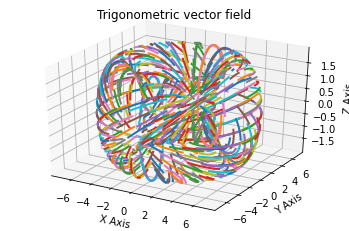

In [18]:
ax = plt.figure().add_subplot(projection='3d')

for i in range(N):
    ax.plot(*xyz_coords[i].T, lw=2)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Trigonometric vector field")

plt.show()
traj_list = xyzs

In [21]:
t2s = Traj2Sim()

load=True

if load == False:
    t2s.set_trajectories(traj_list)
    t2s.compute_mssd(verbose=False)
    t2s.save_bifilt(filename='/content/drive/MyDrive/traj-space/examples/torus/grad_random_trig_625.npy')
if load == True:
    t2s.load_bifilt(filename='/content/drive/MyDrive/traj-space/examples/torus/grad_random_trig_625.npy')

(26, 625, 625)


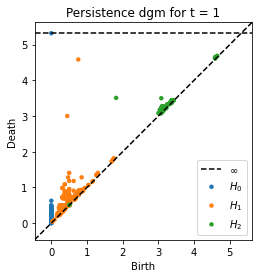

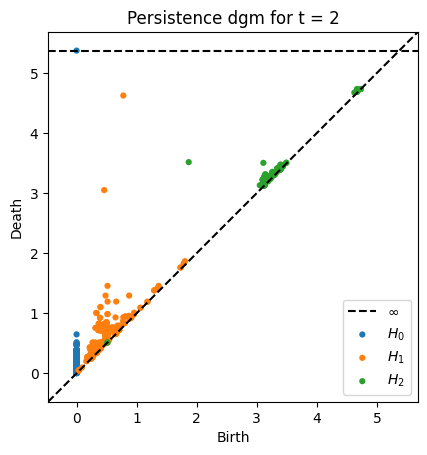

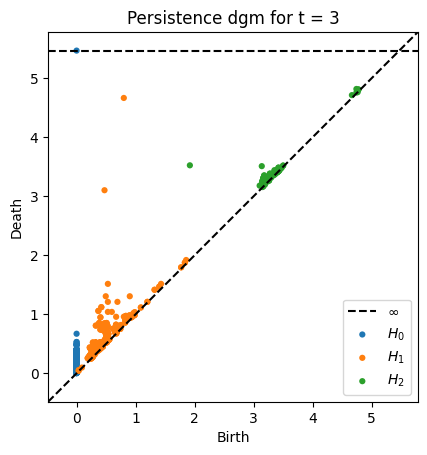

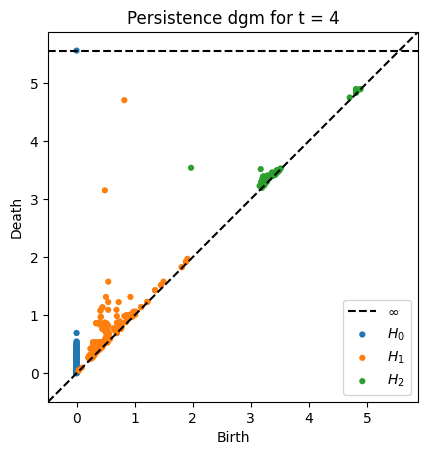

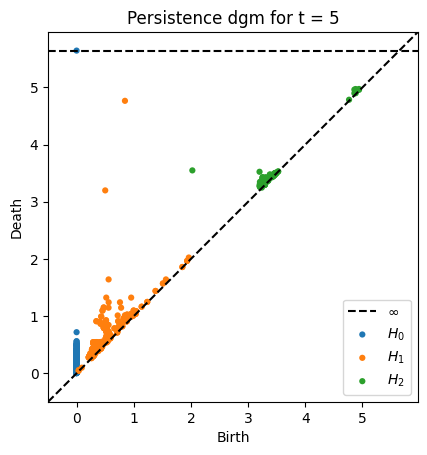

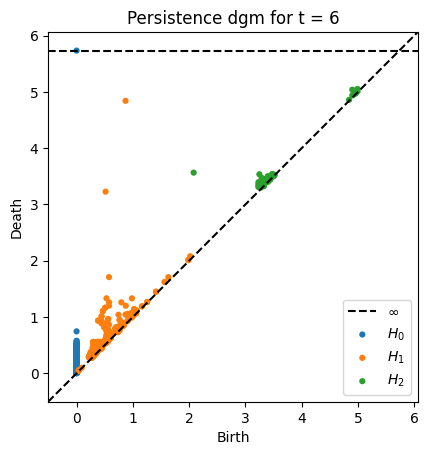

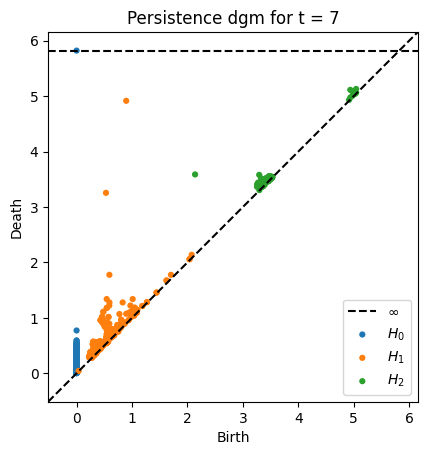

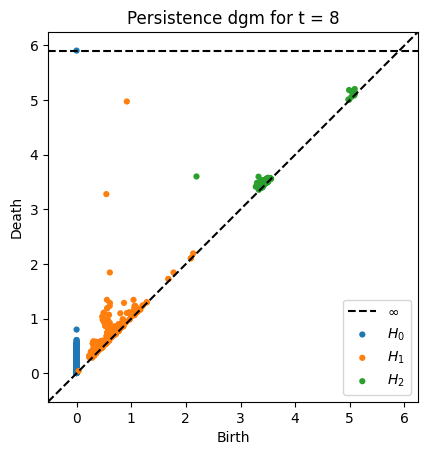

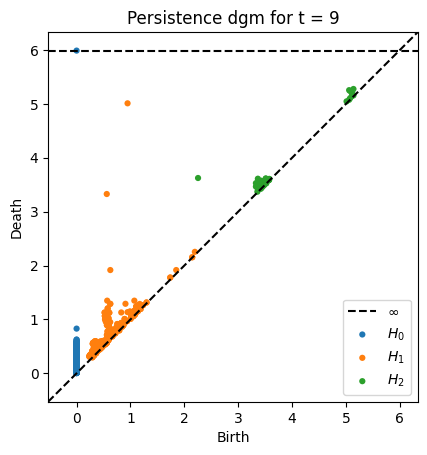

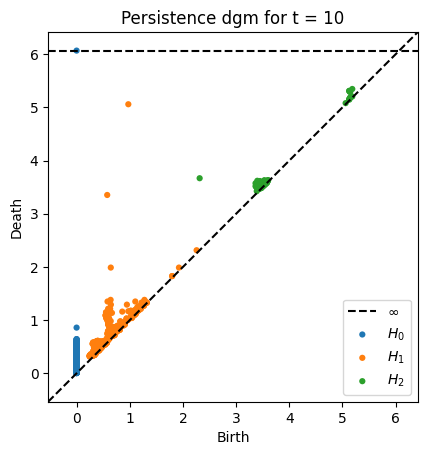

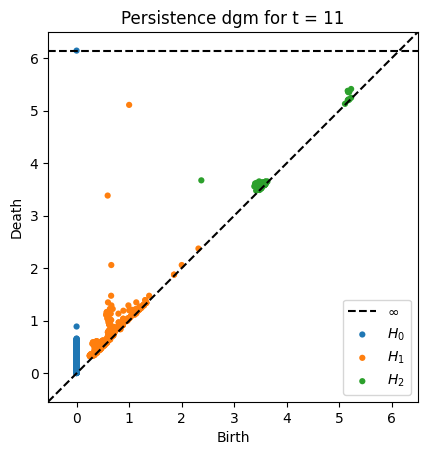

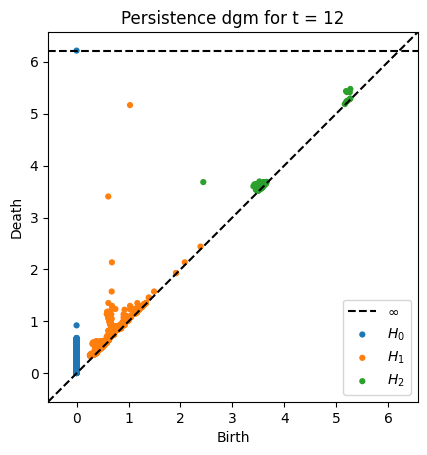

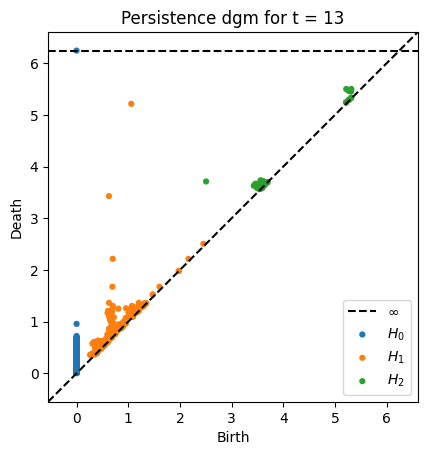

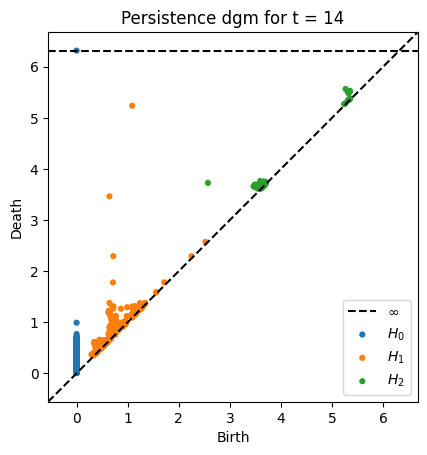

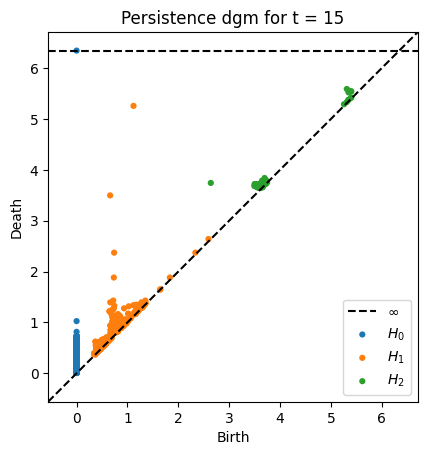

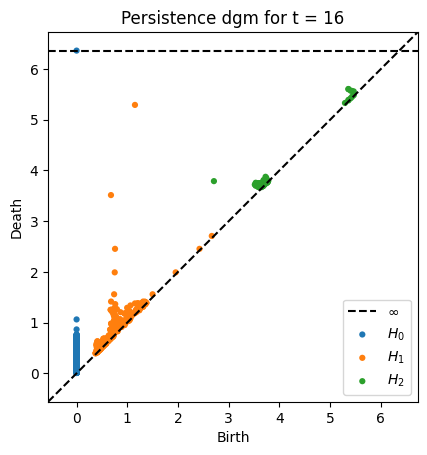

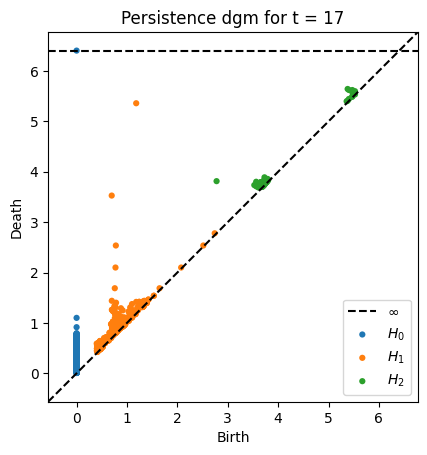

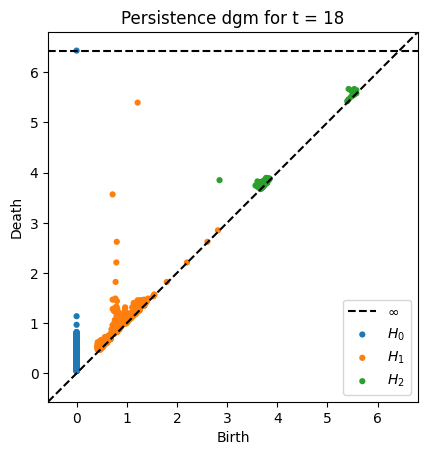

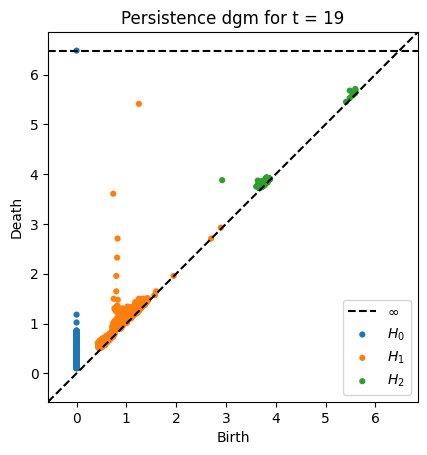

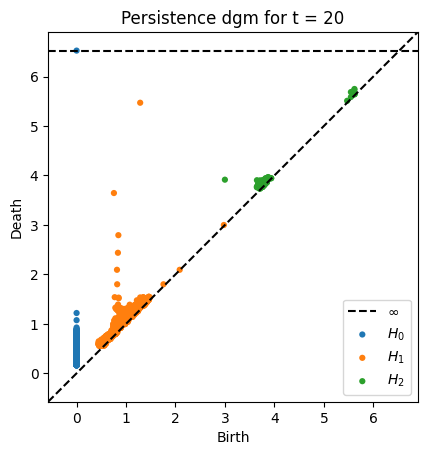

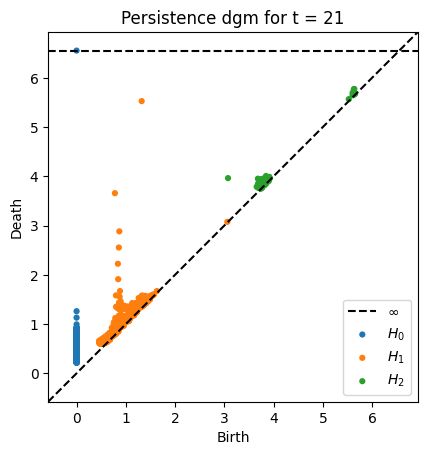

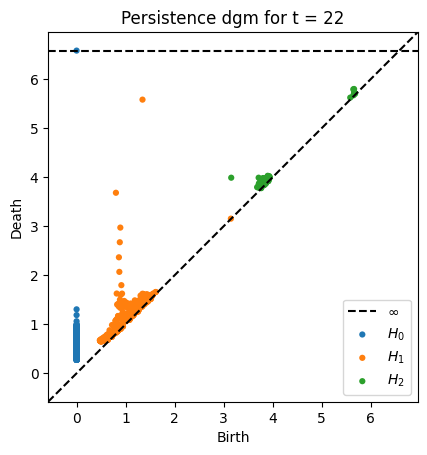

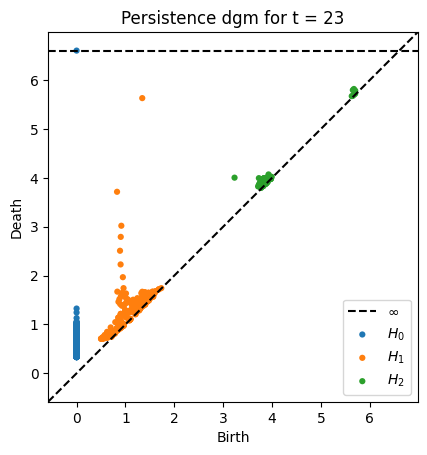

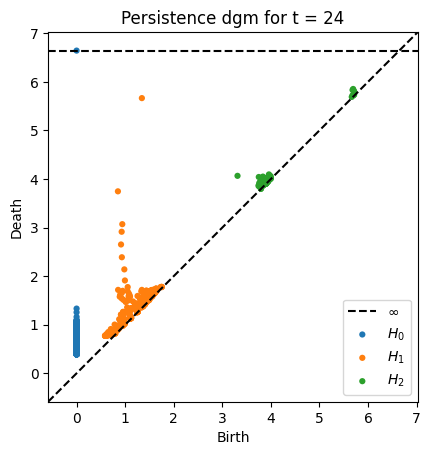

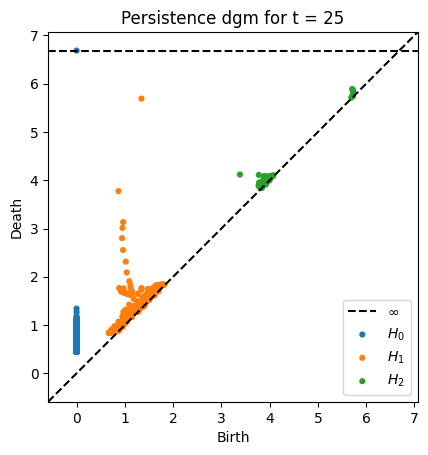

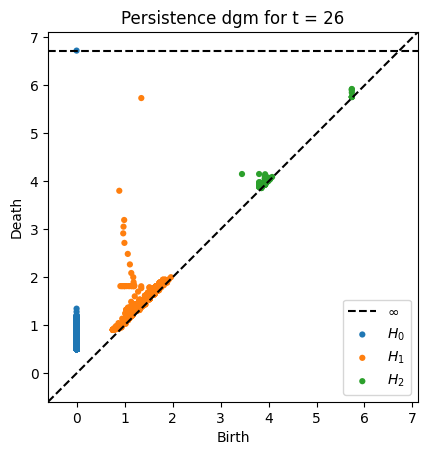

In [22]:
from ripser import ripser
from sklearn import datasets
from persim import plot_diagrams
%matplotlib inline

print(t2s.bifilt.shape)

for i in range(t2s.bifilt.shape[0]):
    dgms = ripser(t2s.bifilt[i,:,:], distance_matrix=True, maxdim=2)['dgms']
    plt.clf()
    plt.title('Persistence dgm for t = '+ str(i+1))
    plot_diagrams(dgms, show = True)
